<a href="https://colab.research.google.com/github/silmarildust/SIP-2024/blob/main/figures/fig3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/silmarildust/SIP-2024/raw/main/figures/data/dataplussf.xlsx

--2024-07-19 05:49:02--  https://github.com/silmarildust/SIP-2024/raw/main/figures/data/dataplussf.xlsx
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/silmarildust/SIP-2024/main/figures/data/dataplussf.xlsx [following]
--2024-07-19 05:49:02--  https://raw.githubusercontent.com/silmarildust/SIP-2024/main/figures/data/dataplussf.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248716 (243K) [application/octet-stream]
Saving to: ‘dataplussf.xlsx’

dataplussf.xlsx     100%[===================>] 242.89K  --.-KB/s    in 0.03s   

2024-07-19 05:49:02 (8.73 MB/s) - ‘dataplussf.xlsx’ saved [248716/2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel("dataplussf.xlsx", skiprows=13)

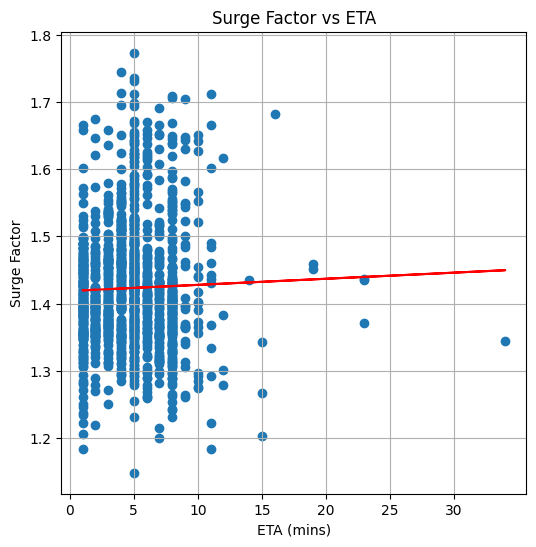

0.029261629699440336


In [4]:
surge_factor = df['Surge factor']
eta = df['ETA']

plt.figure(figsize=(6, 6))
plt.scatter(eta, surge_factor)

plt.ylabel('Surge Factor')
plt.xlabel('ETA (mins)')
plt.title('Surge Factor vs ETA')
plt.grid(True)

plt.xticks(range(0, int(max(eta)) + 1, 5))

m, b = np.polyfit(eta, surge_factor, 1)

plt.plot(eta, m*eta + b, color='red')

plt.show()

correlation = df['ETA'].corr(df['Surge factor'])
print(correlation)

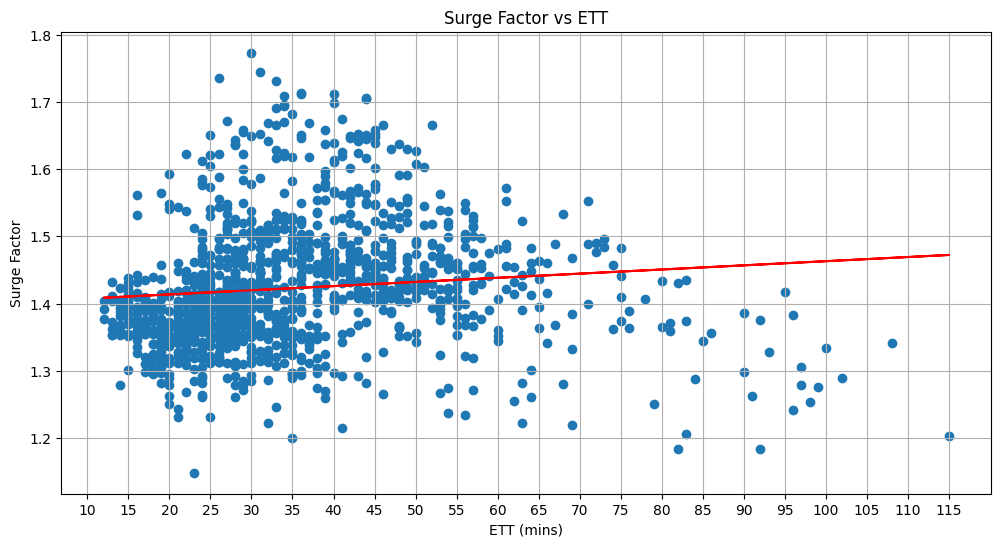

0.10533863955246608


In [5]:
eta = df['ETT']
surge_factor = df['Surge factor']

plt.figure(figsize=(12, 6))
plt.scatter(eta, surge_factor)

plt.ylabel('Surge Factor')
plt.xlabel('ETT (mins)')
plt.title('Surge Factor vs ETT')
plt.grid(True)

plt.xticks(range(0, int(max(eta)) + 1, 5))

m, b = np.polyfit(eta, surge_factor, 1)

plt.plot(eta, m*eta + b, color='red')

plt.show()

correlation = df['ETT'].corr(df['Surge factor'])
print(correlation)

Text(50.222222222222214, 0.5, 'Surge factor')

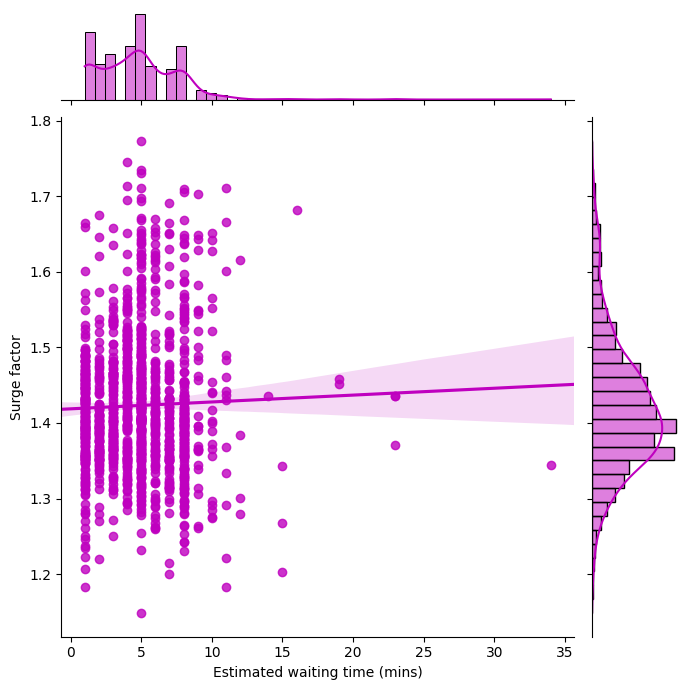

In [6]:
g = sns.jointplot(x="ETA", y="Surge factor", data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)
g.ax_joint.set_xlabel('Estimated waiting time (mins)')
g.ax_joint.set_ylabel('Surge factor')

Text(50.222222222222214, 0.5, 'Surge factor')

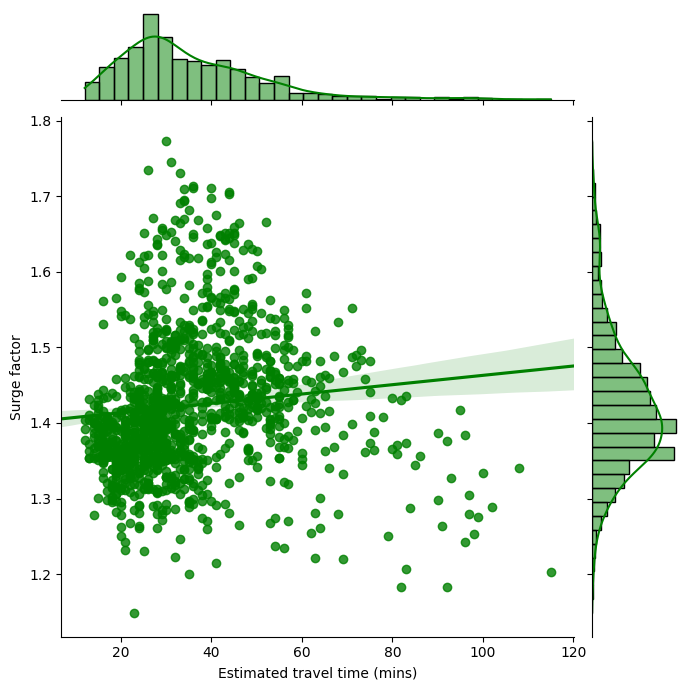

In [7]:
j = sns.jointplot(x="ETT", y="Surge factor", data=df,
                  kind="reg", truncate=False,
                  color="g", height=7)
j.ax_joint.set_xlabel('Estimated travel time (mins)')
j.ax_joint.set_ylabel('Surge factor')

0.2833931176374479


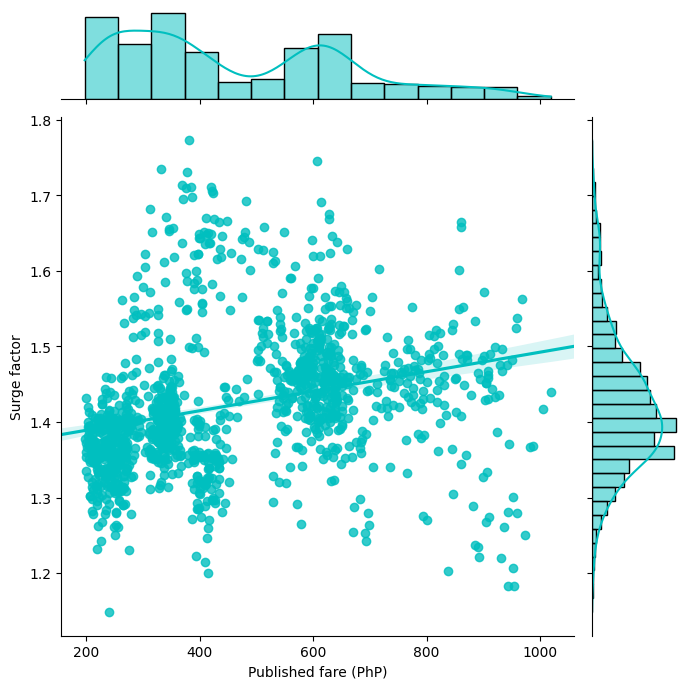

In [8]:
k = sns.jointplot(x="grab car 4-seater_published fare (in php)", y="Surge factor", data=df,
                  kind="reg", truncate=False,
                  color="c", height=7)
k.ax_joint.set_xlabel('Published fare (PhP)')
k.ax_joint.set_ylabel('Surge factor')

correlation = df['grab car 4-seater_published fare (in php)'].corr(df['Surge factor'])
print(correlation)

0.12638184681261813


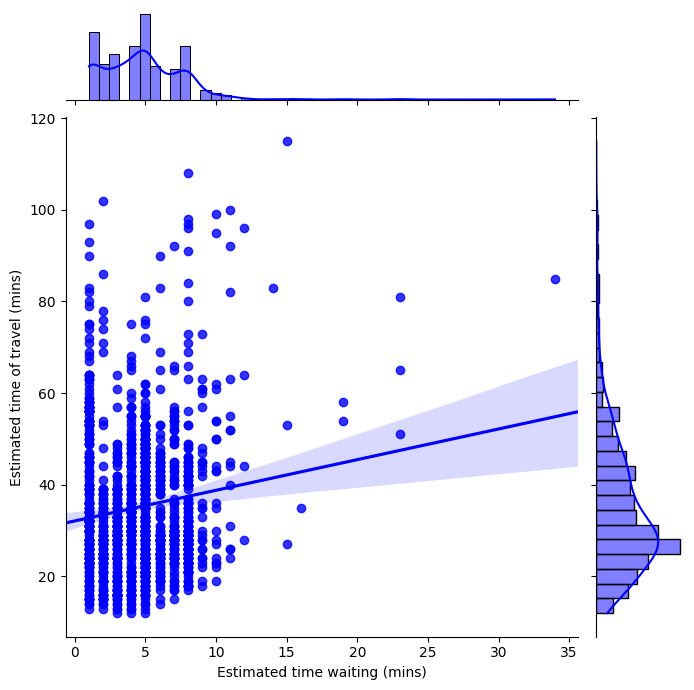

In [11]:
k = sns.jointplot(x="ETA", y="ETT", data=df,
                  kind="reg", truncate=False,
                  color="b", height=7)
k.ax_joint.set_xlabel('Estimated time waiting (mins)')
k.ax_joint.set_ylabel('Estimated time of travel (mins)')

correlation = df['ETT'].corr(df['ETA'])
print(correlation)